# Week 4

## Overview

This week is all about Machine Learning. We will look at KNN, which is a super-simple, yet useful method for understanding your data. Then we'll consider regression. Good old linear regression, then multiple regression, and finally logistic regression. It is extremely lucky that we're learning about regression because we will use this tool to do real prediciton of crim in SF.

Here's a summary of the program:

 * Sune will address the class and focus onx how we like that the book is "from scratch", but that we generally recommend that you guys use tools out there (such as `scikit-learn`) when you solve the exercises.
 * We start by exploring KNN to study the patterns of Drugs, Prostitution, and Drunk driving across SF. 
 * Then we'll play around with regression models and use them to predict the future


# Part 1: KNN

To become an expert on KNN, you will have to view the video, the read the chapter and finally solve a fun little exercise.

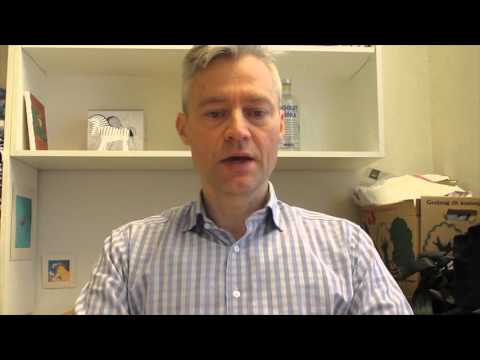

In [3]:
# Ole on K-nearest-neighbors
from IPython.display import YouTubeVideo
YouTubeVideo("OE159z8kC-Y",width=800, height=450)

> _Reading_: DSFS Chapter 12. Pay special attention to the example on page 153-156.

---

> _Warm up exercises_: K-nearest-neighbors
> * How does K-nearest-neighbors work? Explain in your own words.
> * Explain in your own words: What is the curse of dimensionality? Use figure 12-6 to as part of your explanation.

> _Exercise_: K-nearest-neighbors map.
> 
> The goal of this exercise is to create a useful real-world version of the example on pp153 in DSFS. We know from last week's exercises that the focus crimes `PROSTITUTION`, `DRUG/NARCOTIC` and `DRIVING UNDER THE INFLUENCE` tend to be concentrated in certain neighborhoods, so we focus on those crime types since they will make the most sense a KNN - map. 
> 
> * Begin by using `geoplotlib` to plot all incidents of the three crime types on their own map using [`geoplotlib.kde()`](https://github.com/andrea-cuttone/geoplotlib/blob/master/examples/kde.py). This will give you an idea of how the varioius crimes are distributed across the city.
> * Next, it's time to set up your model based on the actual data. You can use the code supplied in the book or try out `scikit-learn`'s [`KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). If you end up using the latter (recommended), you may want to check out [this example](http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html) to get a sense of the usage.
>   - You don't have to think a lot about testing/trainig and accuracy for this exercise. We're mostly interested in creating a map that's not too problematic. **But** do calculate the number of observations of each crime-type respectively. You'll find that the levels of each crime varies (lots of drug arrests, an intermediate amount of prostitiution registered, and very little drunk driving in the dataset). Since the algorithm classifies each point according to it's neighbors, what could a consequence of this imbalance in the number of examples from each class mean for your map?
>   - You can make the dataset 'balanced' by grabbing an equal number of examples from each crime category. How do you expect that will change the KNN result? In which situations is the balanced map useful - and when is the map that data in proportion to occurrences useful? Choose which map you will work on in the following. 
> * Now create an approximately square grid of point that runs over SF. You get to decide the grid-size, but I recommend somewhere between $50 \times 50$ and $100 \times 100$ points. I recommend plotting using `geoplotlib.dot()`. 
> * Visualize your model by coloring the grid, coloring each grid point according to it's category. Create a plot of this kind for models where each point is colored according to the majority of its 5, 10, and 30 nearest neighbors. Describe what happens to the map as you increase the number of neighbors, `K`.  


## Part 2: Linear Regression (DSFS Chapter 14)

> _Reading_: Work through DSFS Chapter 14. 

Now it's time to watch a little Ole-video.

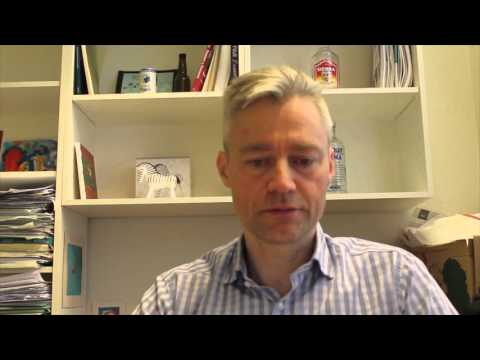

In [5]:
# Ole discusses Linear Regression
YouTubeVideo("_XK8JcpKsBw",width=600, height=338)

> _Exercises_: Just a few questions to check that you've read the material.
> 
> * What's the point of the error term $\epsilon_i$? (That one wasn't around when you learned how to figure out the slope and $y$ intercept of straight lines in high school).
> * Why do you think Joel figures out how to find $\alpha$ and $\beta$ using gradient descent when we already know how to find the best values analytically?

## Part 3: Building an understanding of Multiple Regression and Logistic Regression

> _Reading_: Start by reading DSFS Chapter 15.

And let's watch another video to stimulate the visual part of your brain + get an expert's (Ole's) opinon on what's most important about Multiple regression.

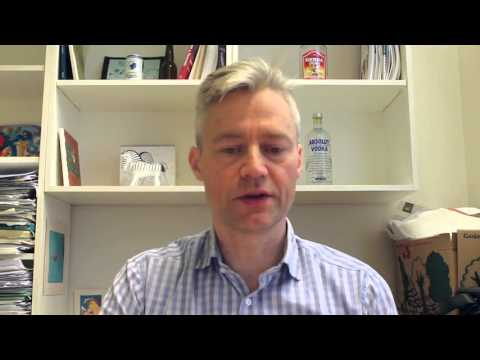

In [6]:
# Ole explains Multiple Regression
YouTubeVideo("lLWJbCFoB30",width=600, height=338)

> _Exercises_: Now some questions for the text. Answer the following questions in your own words
>   
> * It's a requirement that the inputs of the model are linearly independent. Why is that important? Illustrate what can go wrong using a simple example.
> * What is _bootstrap_? When is it useful?
> * What is _regularization_? In what cases is reqularization important? Illustrate what can go wrong using a simple example.

---

> _Reading_: Go over DSFS Chapter 16 on Logistic regression

And then watch the corresponding video

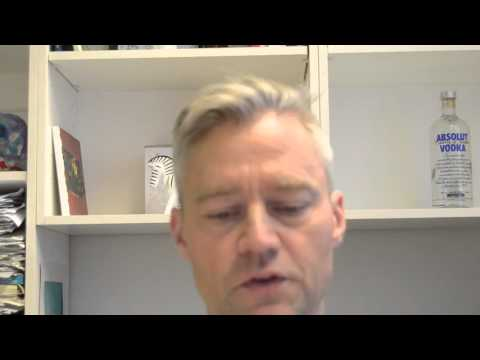

In [7]:
# Ole explains Logistic Regression
YouTubeVideo("CuJQazbT6d0",width=600, height=338)

## Part 4: Use regression models 

We assume that the amount of crime of **some specific type** of crime **in a certain area** is correlated with a number of things, it could be
* The total amount of crime
* The time of day
* The day of the week
* The year
* Crime (both of the type in question, and in general) in the hours before the time we're looking at. 
* The total amount of crime in adjacent areas
* Etc. (you might have better ideas)

If they are correlated, we can use that information for prediction. In the exercises below, we will explore some of these. Let's start with a simple linear regression.

**Little note**. And let me say this now: I love the the book is 'from scratch' so that you can see how everything is developed. It's important to me that there is no black magic here ... that you understand that you can literally code everything yourself and it's not that difficult. ***But*** that being said, `scikit-learn` is an absolutely great library for machine learning, and it's OK if you use it here. (That's what you'll be using in the future anyway).

> _Exercise_: Fun with linear regression.
>
> We start by picking an area and a crime type, I'm starting with *all of SF* and `LARCENY/THEFT` just to have a lots of data, but you're free to try different crime types and areas. We will use 2015 data for training (or feel free grab everything if need big data in your life).
>
> From last week we know that there is a strong connection between time-of-day and the number of crimes. 
>
> We need variables that have an approximately linear dependance on each other, but the daily crime counts are non-monotonic: they go up and then down again. **For that reason, we will only make predictions for the interval 5am-5pm where the crime count for `LARCENY/THEFT` is more or less linearly increasing**.
>
> * Let's check that there actually is a correlation. The goal is to first create a scatterplot. 
>   - Put time-of-day (in the range 05:00-17:00) on the $x$-axis. 
>   - Next you go over the training data and bin and observed number of `LARCENY/THEFT` crimes per hour. You should have 12 data-points per day of training data.
>   - Plot the (time-of-day, bin-count) tuples. Does it look like there is a correlation? 
>   - Report the Pearson-correlation. 
>   - Now we can fit a straight line to the data, add the straight line to your scatterplot (similar to fig 14-1 in the book). 

In order to use this model of the data to make predictions, we do the following. We pick a time where we want to predict the amount of crime, and we can simply read the value off the straight line.

> _Exercise_: Fun with multiple regression. 
> 
> Creating the line above required a lot of data-wrangling, but we've basically just fit a straight line ... something we've known how to do for many years (and not thought about it as a prediction tool). Now, we're going to go a little bit futher. 
>
> We are going to improve/extend our model by **incorporating the *total* amount of crime** in the area we're considering (e.g. all of SF). 
> 
> The idea is that if there is a lot going on a certain day (e.g. a protest or a music festival taking place), then more crime in general will be happening - including more of the crime we're looking at (e.g. `LARCENY/THEFT`). 
> 
> Before we can include this in the model, however, we have to think carefully. There are two important points
>
> ### Point 1: Difference wrt average. 
>
> Remember that we should not have correlations between our the variables in multiple regression (see chapter 15, "Further Assumptions of the Least Squares Model"). But we expect the **total amount of crime** variable to be strongly correlated with **time-of-day** variable. 
> 
> We can remove this dependence, however, by looking at a slightly tweaked version of the **total amount of crime** variable. Instead of simply considering the total number of crimes, we will work with the **difference in *total amount of crime* with respect to the average total number of crimes in that time-bin**. 
>  
> Let's consider how to calculate this quantity **for a specific timebin**. Let's pick 5am-6am; we simply call this bin $5am$ to keep the notation nice and clean. 
> 
> We start by calculating the average number of crimes in that bin. Thus, for each day in the training period (e.g. 2015), you measure the total number of crimes in the city between 5am and 6am. That gives you a list of $365$ values, one for each day in the period. Let's call this list $\textbf{C}(5am) = [C_{jan 1}(5am),C_{jan 2}(5am),\dots,C_{dec 31}(5am)]$.
> 
>You then add up the count for all days and divide by the number of days to find the average
>
> $$C^{ave}(5am) = \frac{1}{365}\sum_{i\in\{ \textrm{days in 2015}\} } C_i(5am)$$.
>
> To get the *difference with respect to the average*, $\textbf{C}^{eff}(5am)$, for each day in the 5am-6am bin, you simply look at the element-wise difference to the actual counts $\textbf{C}(5am)$.
>
\begin{eqnarray}
 \textbf{C}^{eff}(5am) &=& \textbf{C}(5am)-C^{ave}(5am) \\
                 &=& \left[C_{jan 1}(5am)-C^{ave}(5am),C_{jan 2}(5am)-C^{ave}(5am),\ldots,C_{dec 31}(5am)-C^{ave}(5am)\right]\\
                 &=& \left[C^{eff}_{jan 1}(5am), \ldots, C^{eff}_{dec 31}(5am)\right].
\end{eqnarray}
>
>  **Examples**. So, to pick a concrete example: if the average number of crimes in the $5am$ bin is $C^{ave}(5am) = 5.4$ and we observe $C_{jan 1}(5am) = 8$ on January 1st, then we have, $C^{eff}_{jan 1}(5am) = C_{jan 1}(5 am) - C^{ave}(5am) = 2.6$ as our observation for that time-bin. This encodes that 8 crimes is $2.6$ more that we would expect, on average, in the $5am$ timebin. Similarly, if we had observed $4$ crimes for that bin, we would use $C^{eff}_{jan 1}(5am) = -1.4$ as our observation. This encodes that we are observing less crime that we expect based on what happens on average.
> 
> Finally, we perform the same calculation **for all of the time-bins between 5am-5pm** to get the full set of observations for the total crime counts variable.
>
> ### Point 2: Rescaling. 
> In order for the multiple regression to work well, it is important that the input variables have approximately the same size, so I recommend you rescale both of your input variables to e.g. the range $[0,1]$.
> 
> ### Back to the exercise
> **Connection to linear regression**. So adding an additional input variable still has a clear interpretation. What you'll be doing is basically plotting a 3D point-cloud. The regression fits a neat plane to your data-cloud. And when we want to make a prediction, we find the *time-of-day* we want to predict for as well as the *effective number of crimes*, and based on those two numbers we can read the value off the fitted plane.
>
> With all that preparation, we're ready for the exercise. 
> * Start by perparing your data as described above. You should create pairs of (time-of-day, $c_{eff}$).
> * Fit the data using multiple regression. 

> _Exercise_: Evaluate the two models.
> 
> So far we've only fit the data. Now, let's make some predictions. 
> We will compare the accuary of the simple linear regression with the multiple regression to see what we have gained by increasing the model complexity. 
>
> We test on two separate weeks of data from 2016. We use the first 7 days (Week A) of January 2016 and first 7 days of June 2016 (Week B). 
>
> We measure error for a time-bin simply as the absolute difference between predicted crime and observed crime. The error for a week is simply the average error over all time-bins during that week.
> * Report the performance of Simple & Multiple Regression for Weeks A & B (four results total).
> * Comment on your results.